In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

from gymnasium.wrappers import RecordVideo
import os
from IPython.display import HTML
from base64 import b64encode

1. Przygotowanie środowiska 

In [13]:

env_id = "Swimmer-v5"

env = make_vec_env(env_id, n_envs=1, seed=0)

In [14]:
model = PPO(
    "MlpPolicy",
    
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.9,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.0,
    verbose=1,
    tensorboard_log="./ppo_swimmer_tensorboard/"
)

rewards = []
episodes = 50
steps_per_episode = 10000

for i in range(episodes):
    model.learn(total_timesteps=steps_per_episode, reset_num_timesteps=False)
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5, render=False)
    rewards.append(mean_reward)
    print(f"Episode {i+1}/{episodes}, Mean reward: {mean_reward}")

model.save("ppo_swimmer_model")
np.save("rewards.npy", rewards)

Using cpu device
Logging to ./ppo_swimmer_tensorboard/PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -2.87    |
| time/              |          |
|    fps             | 3912     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.05       |
| time/                   |             |
|    fps                  | 2738        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.018815484 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explain

/var/folders/1m/0h0qj6kd7gb_qzlllmbbrcw40000gn/T/ipykernel_91798/721387850.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/1m/0h0qj6kd7gb_qzlllmbbrcw40000gn/T/ipykernel_91798/721387850.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("learning_curve.png")


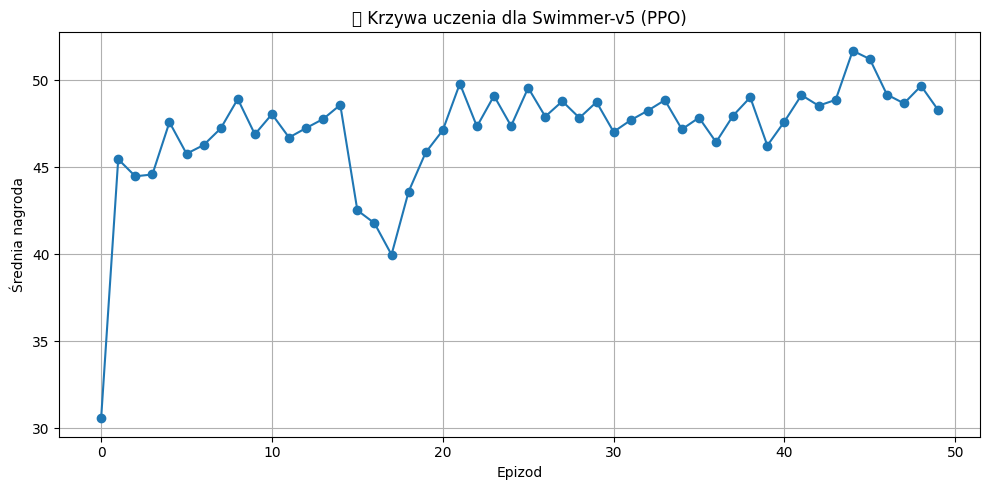

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(rewards, marker='o', linestyle='-')
plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.title("📈 Krzywa uczenia dla Swimmer-v5 (PPO)")
plt.grid(True)
plt.tight_layout()
plt.savefig("learning_curve.png")
plt.show()

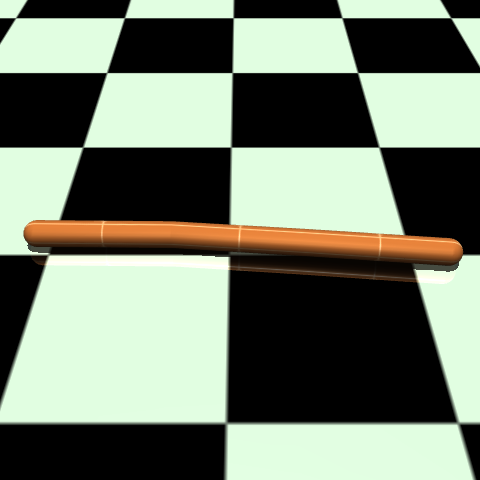

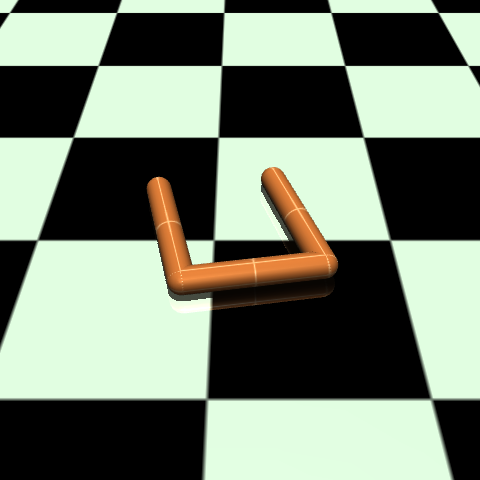

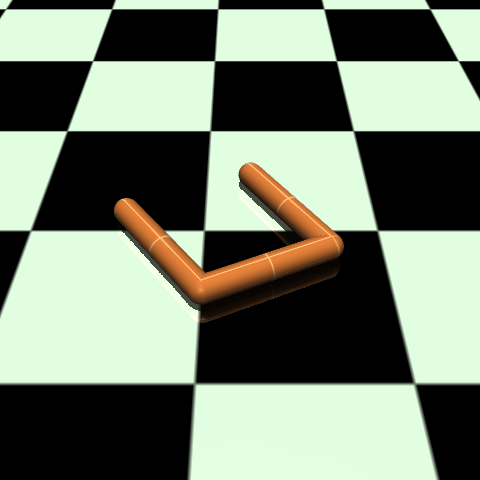

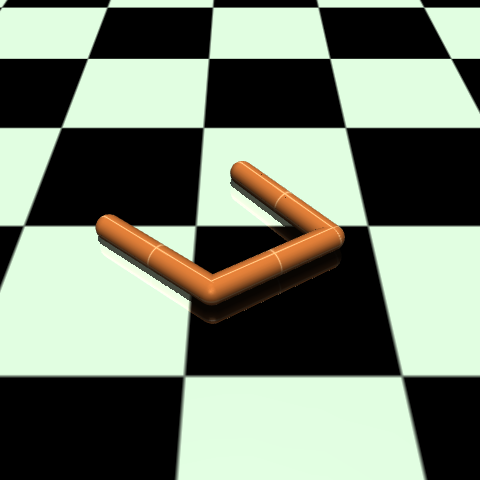

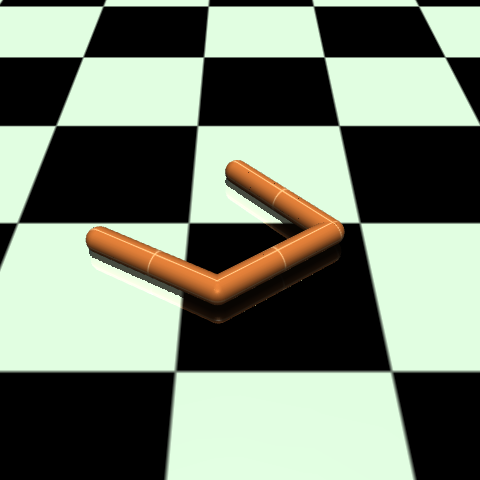

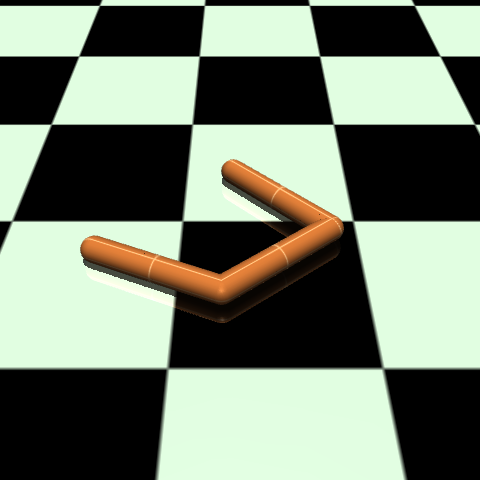

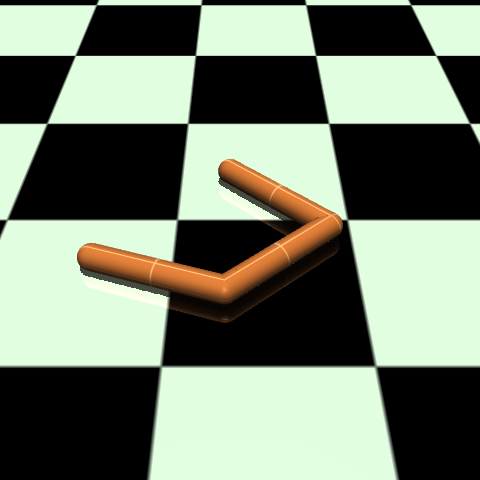

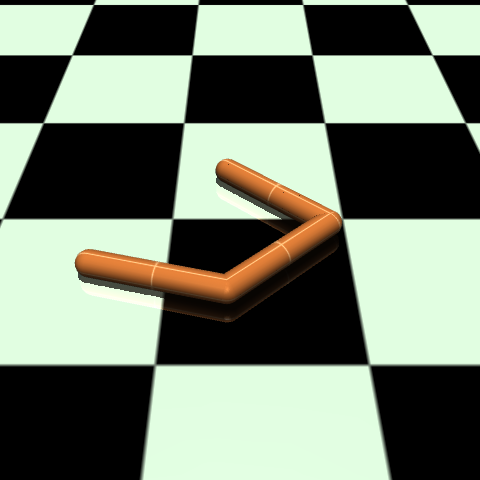

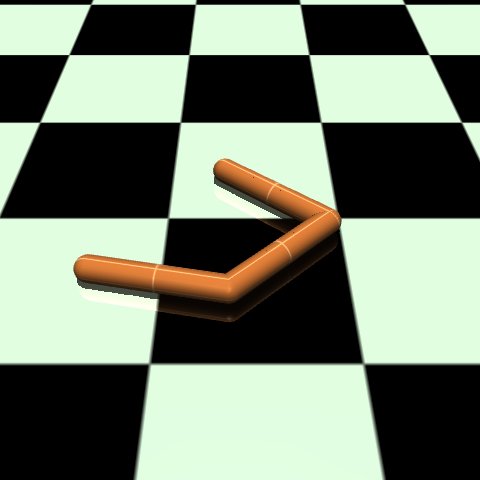

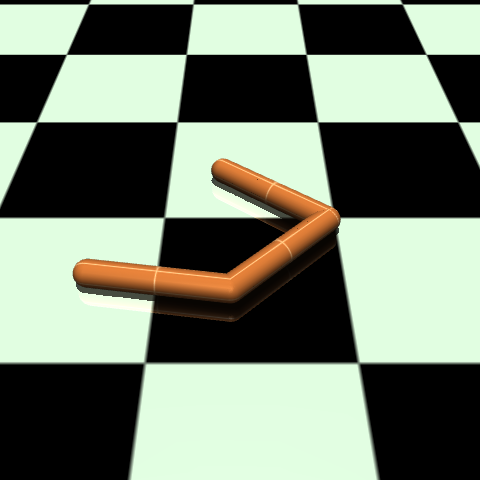

In [16]:
from PIL import Image
from IPython.display import display as ipy_display

env_test = gym.make(env_id, render_mode='rgb_array')
obs, _ = env_test.reset()
frames = []
max_steps = 300

for step in range(max_steps):
    frame = env_test.render()
    frames.append(Image.fromarray(frame))
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_test.step(action)
    if done or truncated:
        break

env_test.close()

# Wyświetl co np. 30-tą klatkę (maks. kilka)
for i in range(0, len(frames), 30):
    ipy_display(frames[i])


In [17]:
gif_path = "ppo_swimmer.gif"
frames[::2][0].save(gif_path, save_all=True, append_images=frames[::2][1:], loop=0, duration=40)

display(HTML(f"<h4>🎬 Działanie agenta PPO w środowisku Swimmer-v5 (GIF)</h4><img src='{gif_path}' width='600'/>"))
